Mala Hasanatul A - 2106042
Susan Melinda - 2106093

LOWPASS FILTER

Ideal Lowpass

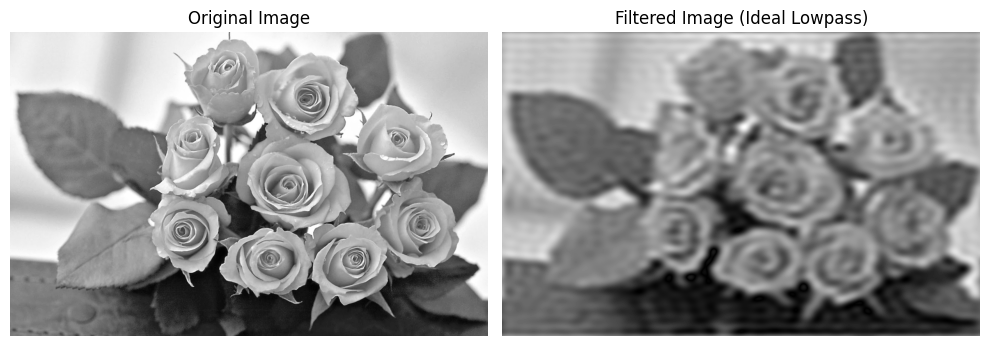

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def ideal_lowpass_filter(d0, shape):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
            if distance <= d0:
                mask[i, j] = 1

    return mask

# Load the image
image = cv2.imread('mawar.jpg', 0)  # Load the image in grayscale
rows, cols = image.shape

# Apply Fourier Transform
f_transform = np.fft.fft2(image)
f_shift = np.fft.fftshift(f_transform)

# Create Ideal Lowpass Filter
cutoff_frequency = 30  # Define the cutoff frequency
ilpf = ideal_lowpass_filter(cutoff_frequency, (rows, cols))

# Apply the filter in frequency domain
f_filtered = f_shift * ilpf

# Inverse Fourier Transform
f_inv_shift = np.fft.ifftshift(f_filtered)
image_filtered = np.fft.ifft2(f_inv_shift)
image_filtered = np.abs(image_filtered)

# Display the original and filtered images
plt.figure(figsize=(10, 6))

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')

plt.subplot(122), plt.imshow(image_filtered, cmap='gray')
plt.title('Filtered Image (Ideal Lowpass)'), plt.axis('off')

plt.tight_layout()
plt.show()


Butterworth Lowpass

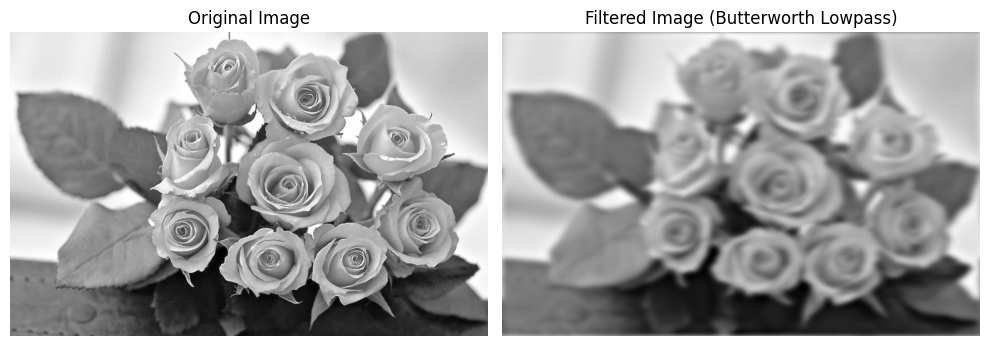

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def butterworth_lowpass_filter(shape, d0, n):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
            mask[i, j] = 1 / (1 + (distance / d0) ** (2 * n))

    return mask

# Load the image
image = cv2.imread('mawar.jpg', 0)  # Load the image in grayscale
rows, cols = image.shape

# Apply Fourier Transform
f_transform = np.fft.fft2(image)
f_shift = np.fft.fftshift(f_transform)

# Define the cutoff frequency and the order for the Butterworth filter
cutoff_frequency = 30  # Adjust this cutoff frequency as needed
order = 2  # Adjust the order of the filter

# Create the Butterworth Lowpass Filter
blpf_filter = butterworth_lowpass_filter((rows, cols), cutoff_frequency, order)

# Apply the filter in the frequency domain
f_filtered = f_shift * blpf_filter

# Inverse Fourier Transform
f_inv_shift = np.fft.ifftshift(f_filtered)
image_filtered = np.fft.ifft2(f_inv_shift)
image_filtered = np.abs(image_filtered)

# Display the original and filtered images
plt.figure(figsize=(10, 6))

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')

plt.subplot(122), plt.imshow(image_filtered, cmap='gray')
plt.title('Filtered Image (Butterworth Lowpass)'), plt.axis('off')

plt.tight_layout()
plt.show()


Gaussian Lowpass

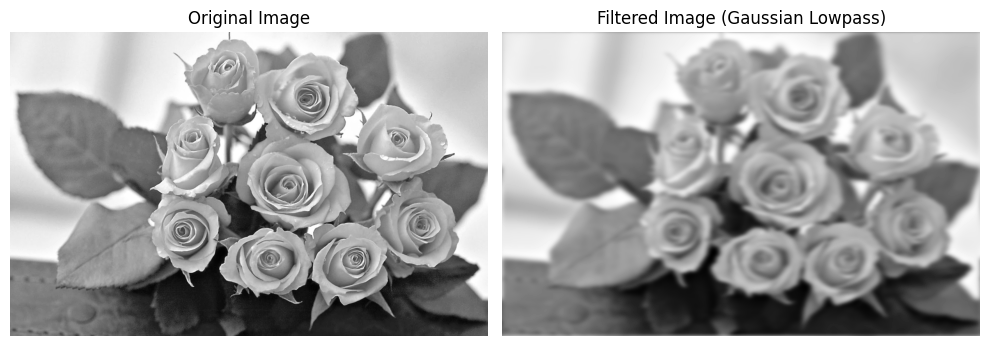

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def gaussian_lowpass_filter(shape, d0):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
            mask[i, j] = np.exp(-(distance ** 2) / (2 * (d0 ** 2)))

    return mask

# Load the image
image = cv2.imread('mawar.jpg', 0)  # Load the image in grayscale
rows, cols = image.shape

# Apply Fourier Transform
f_transform = np.fft.fft2(image)
f_shift = np.fft.fftshift(f_transform)

# Define the cutoff frequency for the Gaussian filter
cutoff_frequency = 30  # Adjust this cutoff frequency as needed

# Create the Gaussian Lowpass Filter
glpf_filter = gaussian_lowpass_filter((rows, cols), cutoff_frequency)

# Apply the filter in the frequency domain
f_filtered = f_shift * glpf_filter

# Inverse Fourier Transform
f_inv_shift = np.fft.ifftshift(f_filtered)
image_filtered = np.fft.ifft2(f_inv_shift)
image_filtered = np.abs(image_filtered)

# Display the original and filtered images
plt.figure(figsize=(10, 6))

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')

plt.subplot(122), plt.imshow(image_filtered, cmap='gray')
plt.title('Filtered Image (Gaussian Lowpass)'), plt.axis('off')

plt.tight_layout()
plt.show()


HIGHPASS FILTER

Ideal Highpass Filter

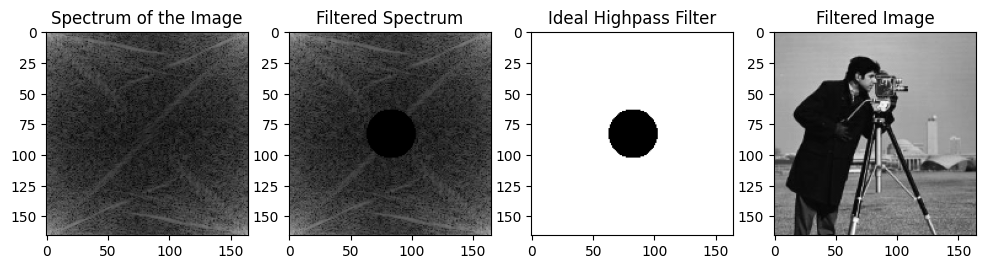

In [ ]:
# Ideal Highpass Filter

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra
f = cv2.imread('kamera.png', cv2.IMREAD_GRAYSCALE)
f = f.astype(float)/255.0

# Mendapatkan ukuran citra
M, N = f.shape

# Melakukan Transformasi Fourier
F = np.fft.fft2(f)

# Menentukan frekuensi cutoff
D0 = 20

# Membuat filter ideal highpass
def hpfilter_ideal(rows, cols, D0):
    return np.array([[0 if np.sqrt((i - rows/2)**2 + (j - cols/2)**2) < D0 else 1 for j in range(cols)] for i in range(rows)])

Li = hpfilter_ideal(M, N, D0)

# Melakukan konvolusi dalam domain frekuensi
fli = np.fft.ifft2(F * Li)

# Menampilkan citra dan hasil filter
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(np.log(1 + np.abs(F)), cmap='gray')
plt.title('Spectrum of the Image')

plt.subplot(1, 4, 2)
plt.imshow(np.log(1 + np.abs(F * Li)), cmap='gray')
plt.title('Filtered Spectrum')

plt.subplot(1, 4, 3)
plt.imshow(Li, cmap='gray')
plt.title('Ideal Highpass Filter')

plt.subplot(1, 4, 4)
plt.imshow(np.abs(fli), cmap='gray')
plt.title('Filtered Image')

plt.show()


Butterworth Highpass Filter

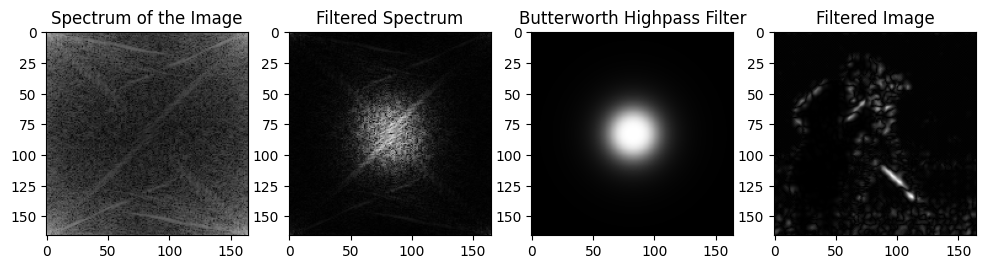

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra
f = cv2.imread('kamera.png', cv2.IMREAD_GRAYSCALE)
f = f.astype(float) / 255.0

# Mendapatkan ukuran citra
M, N = f.shape

# Melakukan Transformasi Fourier
F = np.fft.fft2(f)

# Menentukan frekuensi cutoff dan parameter Butterworth
D0 = 20
sig = 2

# Membuat filter Butterworth highpass
def hpfilter_butterworth(rows, cols, D0, sigma):
    return np.array([[1 / (1 + (np.sqrt((i - rows/2)**2 + (j - cols/2)**2) / D0)**(2 * sigma)) for j in range(cols)] for i in range(rows)])

Lb = hpfilter_butterworth(M, N, D0, sig)

# Melakukan konvolusi dalam domain frekuensi
flb = np.fft.ifft2(F * Lb)

# Menampilkan citra dan hasil filter
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(np.log(1 + np.abs(F)), cmap='gray')
plt.title('Spectrum of the Image')

plt.subplot(1, 4, 2)
plt.imshow(np.log(1 + np.abs(F * Lb)), cmap='gray')
plt.title('Filtered Spectrum')

plt.subplot(1, 4, 3)
plt.imshow(Lb, cmap='gray')
plt.title('Butterworth Highpass Filter')

plt.subplot(1, 4, 4)
plt.imshow(np.abs(flb), cmap='gray')
plt.title('Filtered Image')

plt.show()


Gaussian Highpass Filter

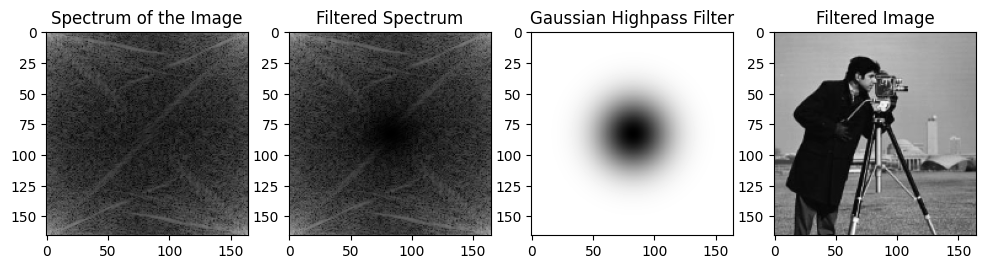

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra
f = cv2.imread('kamera.png', cv2.IMREAD_GRAYSCALE)
f = f.astype(float) / 255.0

# Mendapatkan ukuran citra
M, N = f.shape

# Melakukan Transformasi Fourier
F = np.fft.fft2(f)

# Menentukan frekuensi cutoff untuk Gaussian Highpass Filter
D0 = 20

# Membuat filter Gaussian Highpass
def hpfilter_gaussian(rows, cols, D0):
    return np.array([[1 - np.exp(-((i - rows/2)**2 + (j - cols/2)**2) / (2 * D0**2)) for j in range(cols)] for i in range(rows)])

Lg = hpfilter_gaussian(M, N, D0)

# Melakukan konvolusi dalam domain frekuensi
flg = np.fft.ifft2(F * Lg)

# Menampilkan citra dan hasil filter
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(np.log(1 + np.abs(F)), cmap='gray')
plt.title('Spectrum of the Image')

plt.subplot(1, 4, 2)
plt.imshow(np.log(1 + np.abs(F * Lg)), cmap='gray')
plt.title('Filtered Spectrum')

plt.subplot(1, 4, 3)
plt.imshow(Lg, cmap='gray')
plt.title('Gaussian Highpass Filter')

plt.subplot(1, 4, 4)
plt.imshow(np.abs(flg), cmap='gray')
plt.title('Filtered Image')

plt.show()


filter highpass Gaussian

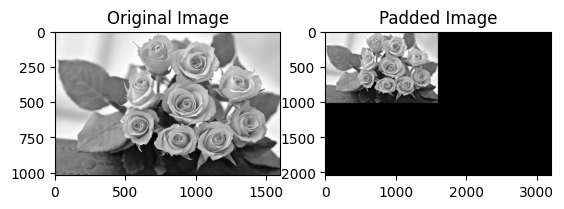

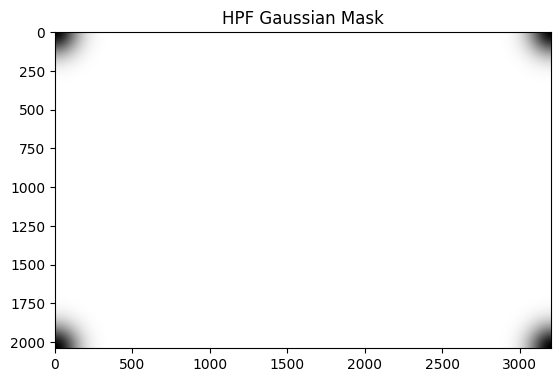

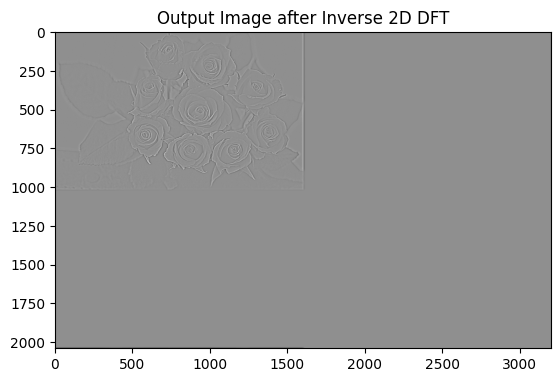

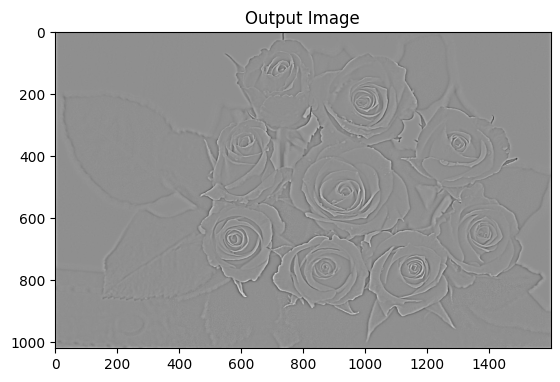

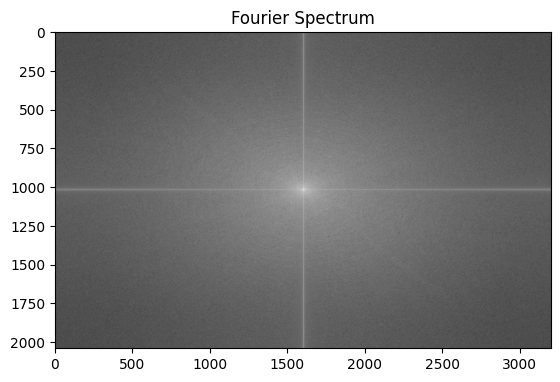

Nilai D0: 102.0


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Baca citra
f = cv2.imread('mawar.jpg', cv2.IMREAD_GRAYSCALE)
M, N = f.shape

# Step 1: Tentukan parameter padding
P = 2 * M
Q = 2 * N

# Step 2: Bentuk citra padding fp(x, y)
fp = np.zeros((P, Q), dtype=np.float64)
fp[:M, :N] = f.astype(np.float64)

# Menampilkan citra asli dan citra yang telah dipad
plt.subplot(1, 2, 1)
plt.imshow(f, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(fp, cmap='gray')
plt.title('Padded Image')

# Step 3: Lakukan transformasi Fourier pada fp(x, y)
F = np.fft.fft2(fp)

# Step 4: Bangkitkan fungsi penapis H (HPF Gaussian)
D0 = 0.05 * P
u = np.arange(P)
v = np.arange(Q)

idx = np.where(u > P / 2)
u[idx] = u[idx] - P

idy = np.where(v > Q / 2)
v[idy] = v[idy] - Q

V, U = np.meshgrid(v, u)
D = np.sqrt(U**2 + V**2)

H = np.exp(-(D**2) / (2 * (D0**2)))
H = 1 - H

# Menampilkan HPF Gaussian Mask
plt.figure()
plt.imshow(H, cmap='gray')
plt.title('HPF Gaussian Mask')

# Step 5: Kalikan F dengan H
HPF_f = H * F

# Step 6: Ambil bagian real dari inverse FFT of G
HPF_f2 = np.real(np.fft.ifft2(HPF_f))

# Menampilkan citra hasil setelah invers FFT
plt.figure()
plt.imshow(HPF_f2, cmap='gray')
plt.title('Output Image after Inverse 2D DFT')

# Step 7: Potong bagian kiri atas sehingga menjadi berukuran citra semula
HPF_f2 = HPF_f2[:M, :N]

# Menampilkan citra hasil
plt.figure()
plt.imshow(HPF_f2, cmap='gray')
plt.title('Output Image')

# Display the Fourier Spectrum
Fc = np.fft.fftshift(np.fft.fft2(fp))
S2 = np.log(1 + np.abs(Fc))

plt.figure()
plt.imshow(S2, cmap='gray')
plt.title('Fourier Spectrum')

plt.show()

D0 = 0.05 * P
print("Nilai D0:", D0)


Ideal Highpass Filter

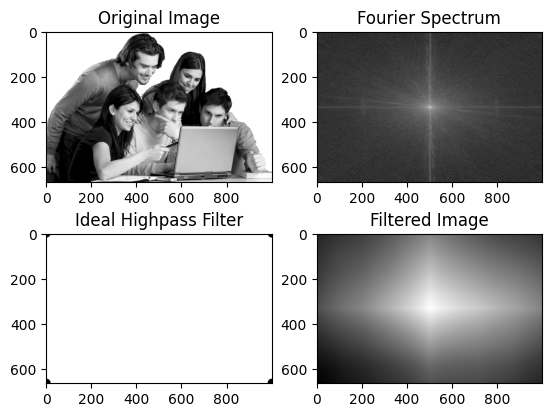

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Baca citra
f = cv2.imread('orang.png', cv2.IMREAD_GRAYSCALE)
f = f.astype(np.float64) / 255.0  # Normalisasi citra ke rentang [0, 1]
M, N = f.shape

# Step 1: Lakukan transformasi Fourier pada fp(x, y)
F = np.fft.fft2(f)

# Step 2: Bangkitkan fungsi penapis H (HPF Ideal)
D0 = 20
u = np.arange(M)
v = np.arange(N)

idx = np.where(u > M / 2)
u[idx] = u[idx] - M

idy = np.where(v > N / 2)
v[idy] = v[idy] - N

V, U = np.meshgrid(v, u)
D = np.sqrt(U**2 + V**2)

Li = np.zeros((M, N))
Li[D > D0] = 1

# Step 3: Terapkan filter menggunakan dftfilt
fli = cv2.filter2D(f, -1, Li, borderType=cv2.BORDER_CONSTANT)

# Menampilkan citra asli, spektrum Fourier, filter, dan citra hasil filter
plt.subplot(2, 2, 1)
plt.imshow(f, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(np.fft.fftshift(np.log(1 + np.abs(F))), cmap='gray')
plt.title('Fourier Spectrum')

plt.subplot(2, 2, 3)
plt.imshow(Li, cmap='gray')
plt.title('Ideal Highpass Filter')

plt.subplot(2, 2, 4)
plt.imshow(fli, cmap='gray')
plt.title('Filtered Image')

plt.show()


Butterworth Highpass Filter

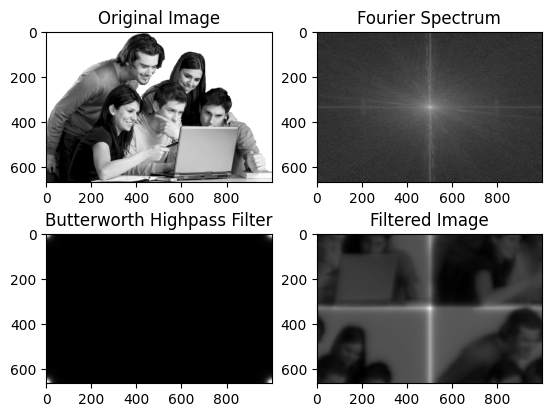

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Baca citra
f = cv2.imread('orang.png', cv2.IMREAD_GRAYSCALE)
f = f.astype(np.float64) / 255.0  # Normalisasi citra ke rentang [0, 1]
M, N = f.shape

# Step 1: Lakukan transformasi Fourier pada fp(x, y)
F = np.fft.fft2(f)

# Step 2: Bangkitkan fungsi penapis H (HPF Butterworth)
D0 = 20
sigma = 2

u = np.arange(M)
v = np.arange(N)

idx = np.where(u > M / 2)
u[idx] = u[idx] - M

idy = np.where(v > N / 2)
v[idy] = v[idy] - N

V, U = np.meshgrid(v, u)
D = np.sqrt(U**2 + V**2)

Lb = 1 / (1 + (D / D0)**(2 * sigma))

# Step 3: Terapkan filter menggunakan dftfilt
flb = cv2.filter2D(f, -1, Lb, borderType=cv2.BORDER_CONSTANT)

# Menampilkan citra asli, spektrum Fourier, filter, dan citra hasil filter
plt.subplot(2, 2, 1)
plt.imshow(f, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(np.fft.fftshift(np.log(1 + np.abs(F))), cmap='gray')
plt.title('Fourier Spectrum')

plt.subplot(2, 2, 3)
plt.imshow(Lb, cmap='gray')
plt.title('Butterworth Highpass Filter')

plt.subplot(2, 2, 4)
plt.imshow(flb, cmap='gray')
plt.title('Filtered Image')

plt.show()


Gaussian Highpass Filter

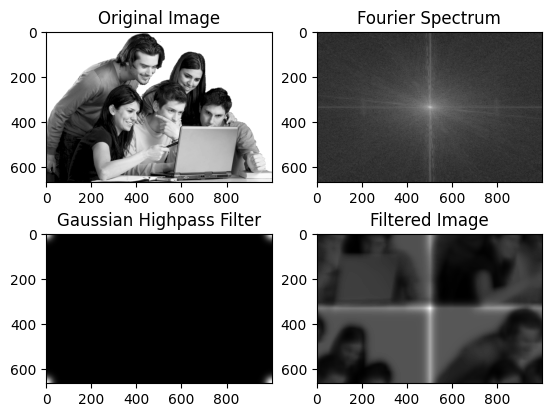

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Baca citra
f = cv2.imread('orang.png', cv2.IMREAD_GRAYSCALE)
f = f.astype(np.float64) / 255.0  # Normalisasi citra ke rentang [0, 1]
M, N = f.shape

# Step 1: Lakukan transformasi Fourier pada fp(x, y)
F = np.fft.fft2(f)

# Step 2: Bangkitkan fungsi penapis H (HPF Gaussian)
D0 = 20

u = np.arange(M)
v = np.arange(N)

idx = np.where(u > M / 2)
u[idx] = u[idx] - M

idy = np.where(v > N / 2)
v[idy] = v[idy] - N

V, U = np.meshgrid(v, u)
D = np.sqrt(U**2 + V**2)

Lg = np.exp(-(D**2) / (2 * (D0**2)))

# Step 3: Terapkan filter menggunakan dftfilt
flg = cv2.filter2D(f, -1, Lg, borderType=cv2.BORDER_CONSTANT)

# Menampilkan citra asli, spektrum Fourier, filter, dan citra hasil filter
plt.subplot(2, 2, 1)
plt.imshow(f, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(np.fft.fftshift(np.log(1 + np.abs(F))), cmap='gray')
plt.title('Fourier Spectrum')

plt.subplot(2, 2, 3)
plt.imshow(Lg, cmap='gray')
plt.title('Gaussian Highpass Filter')

plt.subplot(2, 2, 4)
plt.imshow(flg, cmap='gray')
plt.title('Filtered Image')

plt.show()


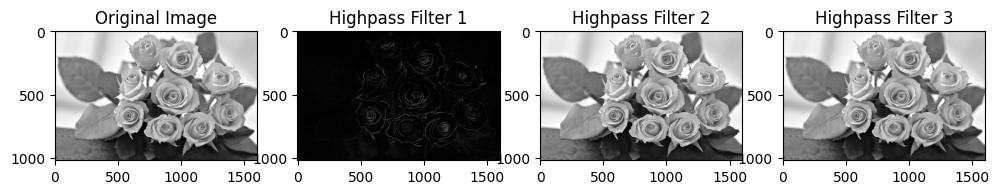

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra grayscale
I = cv2.imread('mawar.jpg', cv2.IMREAD_GRAYSCALE)

# Definisikan filter highpass
hpf1 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
hpf2 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
hpf3 = np.array([[1, -2, 1], [-2, 5, -2], [1, -2, 1]])

# Lakukan konvolusi menggunakan filter highpass
J1 = cv2.filter2D(I, -1, hpf1)
J2 = cv2.filter2D(I, -1, hpf2)
J3 = cv2.filter2D(I, -1, hpf3)

# Konversi hasil konvolusi ke tipe data uint8
J1 = np.uint8(J1)
J2 = np.uint8(J2)
J3 = np.uint8(J3)

# Tampilkan citra asli dan hasil konvolusi
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(I, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 4, 2)
plt.imshow(J1, cmap='gray')
plt.title('Highpass Filter 1')

plt.subplot(1, 4, 3)
plt.imshow(J2, cmap='gray')
plt.title('Highpass Filter 2')

plt.subplot(1, 4, 4)
plt.imshow(J3, cmap='gray')
plt.title('Highpass Filter 3')

plt.show()
